In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from pandas import Series, DataFrame

In [2]:
Bike = pd.read_csv("D:/BDSE26/df_0907.csv",sep = ",")
# ds= DataFrame(Bike)
# X_choice = ds.loc[:, ['sno','Hr', 'holiday', 'school_off','rain', 'tot']]
# kmeansModel = KMeans(n_clusters=4, random_state=46)
# clusters_pred = kmeansModel.fit_predict(X_choice)
# X_choice['k_meeans'] = clusters_pred
# Bike['k_meeans'] = clusters_pred


d:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3369: DtypeWarning: Columns (25,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_choice_reindex = Bike.reindex(columns=[
    'sno',
    'Hr',
    'RH',
    'MRT_Dist',
    'School_Dist',
    'tot',
    'Temperature',
    'Precp',
    'MRT_Out_ppl',
    'MRT_Dist',
    'School_Dist',
    'rent_count'])

X_choice_reindex

,sno,Hr,RH,MRT_Dist,School_Dist,tot,Temperature,Precp,MRT_Out_ppl,MRT_Dist,School_Dist,rent_count
0,80,12,66.0,934.143832,118.041403,44,25.5,0.0,1324,934.143832,118.041403,9
1,80,5,87.0,934.143832,118.041403,44,21.5,0.0,0,934.143832,118.041403,2
2,80,21,79.0,934.143832,118.041403,44,21.4,0.0,1556,934.143832,118.041403,10
3,80,7,69.0,934.143832,118.041403,44,18.1,0.0,1238,934.143832,118.041403,12
4,80,12,85.0,934.143832,118.041403,44,13.6,0.0,1687,934.143832,118.041403,7
...,...,...,...,...,...,...,...,...,...,...,...,...
19212469,500112084,17,87.0,336.624961,396.446516,13,20.5,0.0,988,336.624961,396.446516,3
19212470,500112084,11,61.0,336.624961,396.446516,13,30.6,0.0,896,336.624961,396.446516,2
19212471,500112084,9,71.0,336.624961,396.446516,13,28.4,0.0,2736,336.624961,396.446516,1
19212472,500112084,18,87.0,336.624961,396.446516,13,21.2,0.0,1355,336.624961,396.446516,2


In [4]:
ds = X_choice_reindex.values
X = ds[:, 0:11]
y = ds[:, 11]
y = y.astype('int64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [5]:
import xgboost as xgb
import pickle
#Scikit-learn 接口回歸模型
# 建立xgbrModel模型
xgbrModel=xgb.XGBRegressor(n_estimators=500,
                            learning_rate=0.1,
                            max_depth=7,
                            min_child_weight=3,
                            subsample=0.7,
                            colsample_bytree=0.9,
                            gamma=0.1,
                            reg_alpha=0.1,
                            reg_lambda=0.05,
                            silent=True,
                            tree_method='gpu_hist',
                            n_jobs=4)
# 使用訓練資料訓練模型
xgbrModel.fit(X_train,y_train)
pickle.dump(xgbrModel, open("XGBOOST回歸top.pkl", "wb"))

print("Score: ",xgbrModel.score(X_train,y_train))

[21:39:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Score:  0.7368087071014673


In [6]:
from sklearn import metrics
# 使用test資料預測
predicted = xgbrModel.predict(X_test)
print('R2 score: ', xgbrModel.score(X_test, y_test))
mse = metrics.mean_squared_error(y_test, predicted)
print('MSE score: ', mse)

R2 score:  0.7359691437033569
MSE score:  27.140794407830416


In [7]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error,mean_absolute_percentage_error
#定義回歸模型評估誤差指標
print('回歸模型評估指標結果:')
print('均方誤差【MSE】:', mean_squared_error(y_test,predicted))
print('均方根誤差【RMSE】:',np.sqrt(mean_squared_error(y_test,predicted)))
print('平均絕對誤差【MAE】:',mean_absolute_error(y_test,predicted))
print('絕對誤差中位數【MedianAE】:',median_absolute_error(y_test,predicted))
print('平均絕對百分比誤差【MAPE】:',np.median(np.abs((predicted-y_test)/y_test)))
#print('絕對百分比誤差中位數【MedianAPE】:',median_absolute_percentage_error(y_test,predicted))

回歸模型評估指標結果:
均方誤差【MSE】: 27.140794407830416
均方根誤差【RMSE】: 5.209682755008257
平均絕對誤差【MAE】: 3.083465626762651
絕對誤差中位數【MedianAE】: 1.8452658653259277
平均絕對百分比誤差【MAPE】: 0.4631084203720093


C:\Users\j8003\AppData\Local\Temp\ipykernel_17940\3970045250.py:8: RuntimeWarning: divide by zero encountered in true_divide
  print('平均絕對百分比誤差【MAPE】:',np.median(np.abs((predicted-y_test)/y_test)))


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
d:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38469 (\N{CJK UNIFIED IDEOGRAPH-9645}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151:

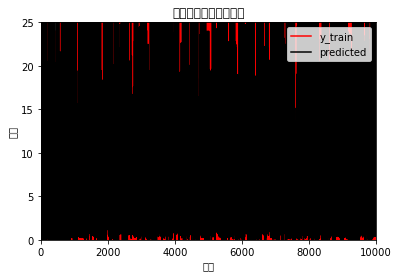

In [8]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.rcParams['font.sans-serif'] = [u'SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
acc =  y_train #实际值数据

pre = predicted #预测值数据

plt.plot(y_train,color="r",label="y_train") #颜色表示

plt.plot(predicted,color=(0,0,0),label="predicted") 

plt.xlabel("个数") #x轴命名表示

plt.ylabel("价格") #y轴命名表示

plt.axis([0,10000,0,25])#设定x轴 y轴的范围

plt.title("实际值与预测值折线图") 

plt.legend()#增加图例

plt.show() #显示图片
 

In [9]:
plt.plot(Bike.X_train['loss'], label='train')
plt.plot(Bike.X_train['val_loss'], label='validation')
plt.title('MSE')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='best')

AttributeError: 'DataFrame' object has no attribute 'X_train'